# Sensing overview

Robots use sensors to take in data about the world around them. The sensors that are provided in your kit can measure button input, distance, loudness, color and light. These sensors are tricky to work with unless you know what exactly they are measuring, so lets take a look at that.

Each sensor will have a *sensor exploration* section in which you can just run the code and learn about how the sensor operates. Then, there will be some exercises for each sensor that will help you use the sensor to make GoPiGo react in different ways! By the end of this notebook you'll have made an object detection system, a clap light switch, and an automatic night light!

In the sections where you are asked to code, look for a line of dashes like this: 

```   
      ----------------------------------------------------------------
        In the space below:
        - do something
      ----------------------------------------------------------------
```
You should look to write your code between those lines. Follow the instructions for each sensor below to get started!

## 1. Grove Button

**Sensor Exploration**

This simple button reads a value of 1 when it is pressed and 0 when it is not pressed. Plug it into **port AD2** and use the script below to test it. *See what happens when you hold the button down!*

In [3]:
"""

BUTTON SENSOR EXPLORATION

"""
import time
from IPython.display import clear_output
# import GoPiGo Modules:
from easygopigo3 import EasyGoPiGo3
# Initialize easy gpg
easyGPG = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
easyGPG.reset_all()

#initialize button sensor on AD2
my_button = easyGPG.init_button_sensor("AD2")

prev_reading=1 #keep track of prev reading

#start the timer
start=time.time()

print('Reading the button for 10 seconds!')

#read every 0.25s for 10s max
while time.time()-start<10:
    
    reading=my_button.read() #take a reading from the button
    
    print('Button reading == %s'%str(reading)) #print the button's reading
    time.sleep(0.25) #wait a bit.
    
    if not reading==prev_reading:
        prev_reading=reading 
        #clear the output 
        clear_output()
    
print("Done!")

Button reading == 0
Done!


**Using button input to change eye color**

Now, knowing how the button records data, finish the script that changes the GoPiGo's eyes' color when the button is pressed.

In [ ]:
try:
    type(my_button)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError
    
"""

USING BUTTON INPUT TO CHANGE EYE COLOR

"""
#Note: make sure you have run the Sensor Exploration script before running this one, so our sensor is initialized. 

red=(255,0,0) #colors
green=(0,255,0)

easyGPG.open_eyes() #turn the lights on

easyGPG.set_eye_color(red) #this is how you set the eye color

#start the timer
start=time.time()

print('Reading the button for 10 seconds!')

#read every 0.1s for 10s max
while time.time()-start<10:
    
    reading=my_button.read() #take a reading from the button
    
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Make a conditional statement that sets the eye color to green 
    when the button reads a value of 1 (on)
    -Make a conditional statement that sets the eye color to red 
    when the button reads a value of 0 (off)
    '''
    
    if reading==1: #if the button is on, make the eyes green! #answer
        
        easyGPG.set_eye_color(green) #answer
        
    elif reading==0: #if the button is off, make the eyes red! #answer
    
        easyGPG.set_eye_color(red) #answer
        
    '''----------------------------------------------------------------'''
    
    easyGPG.open_eyes() #reset the eyes!
    time.sleep(0.1) #wait a bit. 
    
easyGPG.close_eyes() #turn the lights off
print("Done!")

**Using button input to change eye color cont.**

Now make it change color after a change in the button's state, not just when it is pressed down. Meaning, when you press the button in and let go, the color should change. When you press it in and let go, the color should change back. *Hint: make some new variables, one that keeps track of the previous state of the button, and another that keeps track of the color to change to! Update these variables every time the button is pressed.*

There are multiple ways to do this, ask a TA or the instructor if you need help!

In [ ]:
try:
    type(my_button)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError
    
"""

USING BUTTON INPUT TO CHANGE EYE COLOR CONT.

"""
#Note: make sure you have run the Sensor Exploration script before running this one, so our sensor is initialized. 

red=(255,0,0) #colors
green=(0,255,0)

easyGPG.open_eyes() #turn the lights on

easyGPG.set_eye_color(red) #this is how you set the eye color

'''----------------------------------------------------------------'''
'''Define new variables here with their starting values:'''
prev_state=0 #answer
next_color=green #answer
'''----------------------------------------------------------------'''

#start the timer
start=time.time()

print('Reading the button for 10 seconds!')

#read every 0.1s for 10s max
while time.time()-start<10:
    
    reading=my_button.read() #take a reading from the button
    
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Write code that changes the color of the eyes when the button is pressed
    in and then released. 
    
    ###Hint: Make some variables above that keep track of what the previous
    state of the button was (so you can see if it changed) and what the 
    next color to switch to is (so you can set the next color when it
    is pressed)###
    
    '''
    
    #ANSWER
    if reading==1 and not reading==prev_state: #if the button is pushed in, and it has changed states
        
        prev_state=reading #update the state of the button
        easyGPG.set_eye_color(next_color) #change the eye color
        
        if next_color==red:
            next_color=green #if the eye color was red, make it green next time
        elif next_color==green:
            next_color=red #if the eye color was green, make it red next time
            
    else: #if the button hasn't changed states, update the state. 
        prev_state=reading
    #END ANSWER
        
    '''----------------------------------------------------------------'''
    
    easyGPG.open_eyes() #reset the eyes!
    time.sleep(0.1) #wait a bit. 
    
easyGPG.close_eyes() #turn the lights off
print("Done!")

## 2. Distance Sensor

**Sensor Exploration**

The Distance Sensor uses a small laser to determine the distance to an object. The sensor uses the Time of Flight method for a very fast and accurate distance reading. Plug your distance sensor into **an I2C port** and <u>use the provided code below to test the capabilities of the distance sensor.</u> What materials does it work well on? What materials does it not work well on? Why might those materials not work well?

Try:
- Black objects
- Glass
- Aluminum Foil
- Mirrors
- Clear objects
- Round objects (like the balls in your kit)

What happens when you use these materials?


In [6]:
"""

DISTANCE SENSOR EXPLORATION

"""

# import GoPiGo Modules:
from easygopigo3 import EasyGoPiGo3

#import other stuff:
from IPython.display import clear_output
import time
from EDL_Jupyter_resources import HiddenPrints
hiddenprints=HiddenPrints()

# Initialize easy gpg
easyGPG = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
easyGPG.reset_all()

#define our ultrasonic sensor object as plugged into AD1
my_distance_sensor = easyGPG.init_distance_sensor()

#define the delay between readings in seconds
delay= 0.5

#get length of reading in seconds
length = int(input("How long should we take data for?: "))
start=time.time() #mark the start time

while time.time()-start<length: #run for as long as we want to take data
    with hiddenprints: #suppresses console output from .read()
        reading = my_distance_sensor.read() #take a reading for distance in CM
    print("%d cm"%reading) #print the reading 
    time.sleep(delay) #sleep for the delay
    clear_output() #clear the screen
    
print("Done!")

Done!


**Sensor Exploration Cont.**

Before embarking on more projects with the distance sensor, it is important to know the sensors' boundaries. Put your GoPiGo down on a flat surface and place objects in different places in front of it. Notice where it "sees" the objects and where it does not. From your testing, roughly determine the field of view of the sensor and the farthest it can read.

In [ ]:
max_distance = 300 #put the max distance of the sensor here
min_distance = 1 #put the minimum distance of the sensor here

**Detecting objects that are close**

Modify the code below so that you can have the console print "Object detected at x cm away!" where x is the distance the sensor reads, but only when the distance sensor sees an object closer than 20cm.

In [ ]:
try:
    type(my_distance_sensor)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError
    
"""

OBJECT DETECTION 

"""
#Note: make sure you have run the Sensor Exploration script before running this one, so our sensor is initialized. 

#define the delay between readings in seconds
delay= 0.5
#get length of reading in seconds
length = int(input("How long should we take data for?: "))
start=time.time() #mark the start time

while time.time()-start<length: #run for as long as we want to take data
    with hiddenprints: #suppresses console output from .read()
        reading = my_distance_sensor.read() #take a reading for distance in CM    
        
    '''----------------------------------------------------------------'''   
    '''
    In the space below:
    
    -Check to see if the reading is below 20cm, and if it is, 
    print "Object detected at x cm away!" where x is the distance
    of the object as read by the sensor. 
    
    '''
    
    #ANSWER
    if reading<20:
        print("Object detected at %d cm away!"%reading)
    #END ANSWER
    
    '''----------------------------------------------------------------'''

    
    time.sleep(delay) #sleep for the delay
    clear_output() #clear the screen
    



**Detecting that the coast is clear**

Modify your code from the previous section, but now print "Coast is clear!" only when there are no objects in view. Think about how we could detect the absence of an object in front of the sensor. *Hint: think of the farthest that the sensor can read*

In [ ]:
try:
    type(my_distance_sensor)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError
    
"""

COAST IS CLEAR

"""
#Note: make sure you have run the Sensor Exploration script before running this one, so our sensor is initialized. 

#define the delay between readings in seconds
delay= 0.5
#get length of reading in seconds
length = int(input("How long should we take data for?: "))
start=time.time() #mark the start time

while time.time()-start<length: #run for as long as we want to take data
    with hiddenprints: #suppresses console output from .read()
        reading = my_distance_sensor.read() #take a reading for distance in CM   
        
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Write code to check if there are no objects in front of the sensor,
    and if there aren't, print "Coast is clear!"
    ###Hint: Use the sensor exploration script to find out what the 
    sensor reads when there arent any objects in front of it.###
    
    '''
    
    #ANSWER
    if reading>299:
        print("Coast is clear!")
    #END ANSWER
    
    '''----------------------------------------------------------------'''
    
    time.sleep(delay) #sleep for the delay
    clear_output() #clear the screen
    
print('Done!')

**Plotting your data**

Edit the code below so that you can plot your data. What variable should be on the x axis? What variable should be on the y axis? 

In [ ]:
try:
    type(my_distance_sensor)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError
    
"""

PLOTTING YOUR DATA

"""
#Note: make sure you have run the Sensor Exploration script before running this one, so our sensor is initialized.

#get matplotlib and numpy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#define the delay between readings in seconds
delay= 0.5
#get length of reading in seconds
length = int(input("How long should we take data for?: "))

start=time.time() #mark the start time

x_array=np.array([]) #define the numpy arrays
y_array=np.array([])

while time.time()-start<length: #run for as long as we want to take data
    
    with hiddenprints: #suppresses console output from .read()
        reading = my_distance_sensor.read() #take a reading for distance in CM    
        
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Edit the code to plot your distance data on a coordinate plane
    -What should the x axis represent? What should the y axis represent?
    ###Hint: Notice the code to add values to a numpy array, you will 
    use this later!###
    
    '''
    x=time.time()-start  #what should the x value be? #answer
    y=reading  #what should the y value be? #answer
    
    x_array=np.append(x_array,x) 
    y_array=np.append(y_array,y)   #add the values to their arrays
    
    '''----------------------------------------------------------------'''
    
    print("%d cm"%reading) #print the reading
    time.sleep(delay) #sleep for the delay
    clear_output() #clear the screen
    
plt.figure()
plt.title('Distance Data')
plt.plot(x_array,y_array)
plt.show()

Now, run the code and move your distance sensor around so that it gets a variety of data. Notice the resulting matplotlib plot that is produced. What does this plot represent? Can you see the effects of the objects you were moving in the plot? What might this sensor and data combination be useful for in a real world scenario?

## 3. Loudness Sensor

**Sensor Exploration**

This sensor acts like a microphone, responding to changes in sound amplitude by reporting a voltage reading. When there is more sound, the reading goes up, and vice versa. Run this script with your sensor plugged into **port AD1** and watch the numbers that are output to the console. What happens to the numbers when you speak into the sensor? How stable are the readings?

In [1]:
"""

LOUDNESS SENSOR EXPLORATION

"""
# import GoPiGo Modules:
from easygopigo3 import EasyGoPiGo3

#import other stuff:
from IPython.display import clear_output
import time
from EDL_Jupyter_resources import HiddenPrints
hiddenprints=HiddenPrints()

# Initialize easy gpg
easyGPG = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
easyGPG.reset_all()

#initialize the loudness sensor
loudness_sensor=easyGPG.init_loudness_sensor('AD1')

#delay between readings in seconds
delay=0.1

#loop through until a specified length
for i in range(int(float(input('How long to record for?: '))/delay)):
    
    with hiddenprints: #suppress console output
        reading=loudness_sensor.read() #get the reading from the sensor
    
    if i%(2/delay)==0: #clear the console every few readings
        clear_output()
        print('---Last few readings---')
        
    print(reading) #print the readings
    
    time.sleep(delay) #sleep a bit
    
print("Done!")
    

---Last few readings---
302
1128
582
415
571
404
539
402
289
688
Done!


**Plotting your data**

Plotting the data for the loudness sensor makes it easier to understand. We can accomplish this just like we did with the ultrasonic sensor. Take a look at the code below and fill in the missing pieces (you're welcome to copy some of the code from the ultrasonic sensor section). What values do we want plotted on the x-axis, and what values do we want plotted on the y-axis?


How long should we take data for?: 5


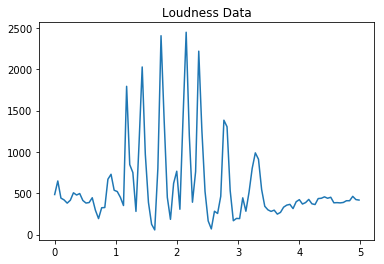

In [3]:
try:
    type(loudness_sensor)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError

"""

PLOTTING LOUDNESS SENSOR DATA

"""
#get matplotlib and numpy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#delay between readings in seconds
delay=0.05

#intializing numpy arrays
x_array=np.array([])
y_array=np.array([])

#get length of reading in seconds
length = int(input("How long should we take data for?: "))

start=time.time()

#loop through until a specified length
while time.time()-start<length:
    
    with hiddenprints: #suppress console output
        reading=loudness_sensor.read() #get the reading from the sensor
    
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Edit the code to plot your distance data on a coordinate plane
    -What should the x axis represent? What should the y axis represent?
    ###Hint: This time there is no helper code, but the process should
    be very similar to what you did for the distance sensor. Use that
    code as an example.###
    '''
    x=time.time()-start  #what should the x value be? #answer
    y=reading  #what should the y value be? #answer
    
    x_array=np.append(x_array,x) 
    y_array=np.append(y_array,y)   #add the values to their arrays
    
    '''----------------------------------------------------------------'''
    
    time.sleep(delay) #sleep a bit

plt.figure()
plt.title('Loudness Data')
plt.plot(x_array,y_array)
plt.show()

**Normalizing Data**

For data where the exact values being recorded aren't as important as the difference between the data points (as is the case for our loudness sensor), we can normalize the data (meaning we divide all of the data by the average of the dataset). This makes the data easier to work with, because in the loudness sensor's case, data where the room is "quiet" will be close to 1, and data where the room is "loud" will be much greater than one. This will make it easier to see when something loud is happening in the room

Can you change the code below to divide every data point in the raw\_data array by the average of the raw\_data array, and then add that result to a new array called normalized\_data?

Plot the resulting normalized data using the method you used in the previous section.


How long should we take data for?: 5


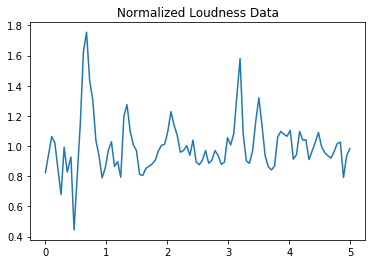

In [4]:
try:
    type(loudness_sensor)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError

"""

NORMALIZING LOUDNESS SENSOR DATA

"""
#Note: make sure you have run the Sensor Exploration script before running this one, so our sensor is initialized.
#get matplotlib and numpy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#initialize arrays
x_array=np.array([])
raw_data=np.array([])
normalized_data=np.array([])

#delay between readings in seconds
delay=0.05

#get length of reading in seconds
length = int(input("How long should we take data for?: "))

start=time.time()

#loop through until a specified length
while time.time()-start<length:
    
    with hiddenprints: #suppress console output
        reading=loudness_sensor.read() #get the reading from the sensor
        
    raw_data=np.append(raw_data,reading) #add the datapoint to the raw_data array 

    x=time.time()-start  #what should the x value be? #answer  
    x_array=np.append(x_array,x) #add x to x-array
    
    time.sleep(delay) #sleep a bit

    
'''----------------------------------------------------------------'''
'''
In the space below:

-Find the mean of the raw_data array 
###Hint: look up numpy's .mean() function on Google.### 
-Now, for each raw_data entry, add a normalized entry (divided
by the mean) to the normalized_data array using .append()

'''
mean=np.mean(raw_data) #answer

for i in raw_data: #answer
    normalized_data=np.append(normalized_data,i/mean) #answer
'''
-Plot the normalized_data on the y-axis and 
use your x_array as the x-axis
###Hint: take a look at previous exercises if you are unsure
how to code this.###

''' 
plt.figure()
plt.title('Normalized Loudness Data')
plt.plot(x_array,normalized_data) #answer
plt.show()



**Clap light switch**

Using what you've learned in the past two sections, can you make the GoPiGo's eyes open up (LED's turn on) when the loudness sensor hears a "loud" sound like a clap?

Edit the code below to get started. *Hint: update your normalized\_data in the main loop. When a normalized value exceeds a certain threshold (like 1.5x maybe) turn the lights on.*

The code will plot your normalized data and show the threshold line. Take a look at how matplotlib does this. Try a bunch of scenarios and find a threshold that works for you? How reliable is your sound-based light? How can you make it more reliable?

How long should we take data for?: 3


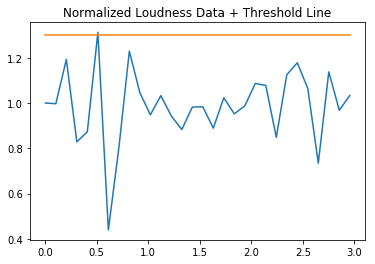

In [5]:
try:
    type(loudness_sensor)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError

"""

CLAP LIGHT SWITCH

"""
#Note: make sure you have run the Sensor Exploration script before running this one, so our sensor is initialized.
#get matplotlib and numpy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#initialize arrays
x_array=np.array([])
raw_data=np.array([])
normalized_data=np.array([])

#delay between readings in seconds
delay=0.1

#threshold for opening eyes
thresh=1.3 #answer

#get length of reading in seconds
length = int(input("How long should we take data for?: "))

#light state
light_state=0 #challenge answer
easyGPG.close_eyes() #close the eyes at the start

start=time.time()

#loop through until a specified length
while time.time()-start<length:
    
    with hiddenprints: #suppress console output
        reading=loudness_sensor.read() #get the reading from the sensor
        
    raw_data=np.append(raw_data,reading) #add the datapoint to the raw_data array 

    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Normalize the reading and add it to the normalized_data array
    -Check to see if the normalized_reading is greater than the threshold
    -If it is, turn the lights on!
    -For a challenge, have it turn the lights back off when it hears
    another sound
    
    '''
    
    mean=np.mean(raw_data) #get the mean of the raw set #answer
    
    normalized_reading=reading/mean #get a normalized data point #answer 
    normalized_data=np.append(normalized_data,normalized_reading) #add the normalized value #answer
 
    if normalized_reading>thresh: #answer 
        '''
        easyGPG.open_eyes() #regular answer
        '''
        if light_state==0: #challenge answer
            easyGPG.open_eyes()
            light_state=1
        elif light_state==1:
            easyGPG.close_eyes()
            light_state=0   
            
    '''----------------------------------------------------------------'''      
    
    x=time.time()-start  #what should the x value be? #answer  
    x_array=np.append(x_array,x) #add x to x-array
    
    time.sleep(delay) #sleep a bit

thresh_array=np.full([len(x_array)],thresh) #used to plot the threshold line

easyGPG.close_eyes()

plt.figure()
plt.title('Normalized Loudness Data + Threshold Line')
plt.plot(x_array,normalized_data) #answer
plt.plot(x_array,thresh_array)
plt.show()


**Challenge:** Can you make the lights turn back off after another clap?

In [ ]:
#Copy the code from above and write your answer to the challenge here. 

## 4. Color Sensor

**Sensor exploration**

This sensor takes readings of the light entering its receiver and then records four values that characterize the light: R,G,B, and A. These values are the red, green, blue, and alpha (clarity) values of the light. It then converts that reading to a different color system called HSV (hue, saturation, value) to make a guess about the color of the incoming light. For more information on the differences between RGB(A) and HSV, [click here](https://www.kirupa.com/design/little_about_color_hsv_rgb.htm).

Plug your sensor into **an available I2C port** and run the following code below. Notice the values of RGB(A) and HSV that get printed. Change the light conditions of the sensor (low light, lots of light) and see what happens to the readings when you put different colored objects near the sensor. What light conditions does the sensor work best in?


In [ ]:
"""

COLOR SENSOR EXPLORATION

"""
# import GoPiGo Modules:
from easygopigo3 import EasyGoPiGo3
from di_sensors.easy_light_color_sensor import EasyLightColorSensor

#import other stuff:
from IPython.display import clear_output
import time
from EDL_Jupyter_resources import HiddenPrints
hiddenprints=HiddenPrints()

# Initialize easy gpg
easyGPG = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
easyGPG.reset_all()

my_lcs=EasyLightColorSensor(led_state=True) #initialize sensor

print('Sensor initialized')
length = int(input("How long should we take data for?: ")) 

delay=1 #delay between readings

start=time.time() #start the clock

while time.time()-start<length: #read for 10 seconds
    in_color = my_lcs.safe_raw_colors() #get raw data reading as a tuple (R,G,B,A)
    r,g,b,a=in_color #get r,g,b,a values
    rgb_color = (r/a,g/a,b/a) #get raw data as a tuple (R,G,B) and normalize by clarity
    hsv_color = my_lcs.translate_to_hsv(rgb_color) #translates the RGB to HSV
    h,s,v=hsv_color #get h,s,v values
    
    print('=======================')
    print('Red: %f'%r)
    print('Green: %f'%g)
    print('Blue: %f'%b)
    print('Alpha: %f'%a)
    print('=======================')
    print('Hue: %d'%h)
    print('Saturation: %d'%s)
    print('Value: %d'%v) 
    print('=======================') #print results
    
    time.sleep(delay)
    clear_output()
    
    
print("Done!")

**Guessing Colors**

The color sensor has a built-in function called *guess\_color\_hsv()* that takes in a (R,G,B,A) tuple (tuples are immutable lists of data types), converts it to HSV, and then uses those values and some fancy math to make a guess about which color it is closest to in nature. The options are black, white, red, green, blue, yellow, cyan, and fuchsia, and the function returns its guess as a tuple containing: (guess string, HSV reading).

Modify the code below so that the color sensor prints its color guess every time the main loop runs. Remember that the *guess\_color\_hsv()* function is called like so:

```python
color_string = my_lcs.guess_color_hsv(in_color)[0]
```

The *color\_string* is the guess (ex: 'red'), *my\_lcs* is the light color sensor object, *guess\_color\_hsv* is the function, *in\_color* is the RGBA tuple input from the sensor reading, and *\[0\]* tells python to only take the string from the return value of guess\_color\_hsv.

In [ ]:
try:
    type(my_lcs)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError
"""

GUESSING COLORS

"""
    
length = int(input("How long should we take data for?: ")) 

delay=1 #delay between readings

start=time.time() #start the clock

while time.time()-start<length: #loop for length seconds
    in_color = my_lcs.safe_raw_colors() #get raw data reading as a tuple (R,G,B,A)
    
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Get the color string guess from the computer 
    using the guess_color_hsv function. 
    -Print this guess every time the loop runs!
    
    '''
    #answer
    color_guess=my_lcs.guess_color_hsv(in_color)[0]
    print('Guess is: %s'%color_guess)
    
    '''----------------------------------------------------------------'''
    
    time.sleep(delay)
    clear_output()
    
    
print("Done!")

**Colored Eyes**

The eyes on top of the GoPiGo robot have the ability to display any RGB color by using an input with three integers (R,G,B) as the values. Modify the code below so that the robot gets RGB input from the color sensor using:
```
rgb_color = my_lcs.safe_rgb()
```
It should then set GoPiGo's eye color to the color of the reading.

The function to color GoPiGo's eyes is used as follows:

```
easyGPG.set_eye_color(rgb_color)
easyGPG.open_eyes()
```

*easyGPG* is the GoPiGo object, *set\_eye\_color* is the function to set both eyes to an RGB color, *rgb\_color* is a 3 integer tuple that represents an RGB color, and *open\_eyes* resets the eyes so that the robot displays the new color.

In [ ]:
try:
    type(my_lcs)
except NameError:
    print("Make sure you have run the Sensor Exploration script above!")
    raise NameError
"""

COLORED EYES

"""
easyGPG.close_eyes()
    
length = int(input("How long should we take data for?: ")) 

delay=1 #delay between readings

start=time.time() #start the clock

while time.time()-start<length: #loop for length seconds
    
    
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Call safe_rgb() on our color sensor and have it return its value
    to a variable called rgb_color
    
    -Use the set_eye_color() function on our GPG object to set its
    eye color to rgb_color

    -Update the eyes using the open_eyes() function
    
    '''
    #answer
    rgb_color = my_lcs.safe_rgb() #get raw data as a tuple (R,G,B)
    print('setting to '+str(rgb_color))
    easyGPG.set_eye_color(rgb_color)
    easyGPG.open_eyes()
    
    '''----------------------------------------------------------------'''
    
    time.sleep(delay)
    clear_output()
    
easyGPG.close_eyes()
print("Done!")

**Night Light (Light Sensor)**

The color sensor can also be used as a pure light detector. By initializing the sensor without its LED illuminated, we can detect changes in ambient light in the room by looking at the *A* value of the RGBA reading. A stands for alpha, or opacity of light entering the sensor. When this value is large, the light entering the sensor is bright (like white light) and when it is small, the light entering the sensor is reduced.

Using similar methodology to the sound sensor clap lights exercise (reading values, normalizing them, looking for changes in the data set), can you turn the GoPiGo into an ambient light-triggered night light? Start by having the light color sensor read the A value of the room repeatedly, until it sees a noticeable drop off (e.g. someone turning off the lights in a room) and, as a response, turn on the GoPiGo's LEDs. 

Run your script a few times and look at the data that gets plotted. Find a value of *thresh* that works the best for detecting when the lights in your room go off. It might help to have a room that gets very dark when the lights are turned off. 

In [ ]:
"""

NIGHT LIGHT (LIGHT SENSOR)

"""
#get matplotlib and numpy 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

my_lcs=EasyLightColorSensor(led_state=False) #turn off the sensor's built in light 

easyGPG.close_eyes() #turn off the gpg leds
    
#initialize arrays
x_array=np.array([])
raw_data=np.array([])
normalized_data=np.array([])

'''----------------------------------------------------------------'''
#threshold to have a "dark" room 
#Play with this value!
thresh=0.7
'''----------------------------------------------------------------'''

length = int(input("How long should we take data for?: ")) 

delay=0.1 #delay between readings

start=time.time() #start the clock

while time.time()-start<length: #loop for length seconds
    A=my_lcs.safe_raw_colors()[-1]
    
    '''----------------------------------------------------------------'''
    '''
    In the space below:
    
    -Add the A value (defined and read above) to the raw_data array
    -Take the mean of the raw_data array and add a normalized A value
    to the normalized_data array
    -Check to see if the normalized value is below a certain threshold
    -If it is, turn on the GPG's eyes using open_eyes()
    
    '''
    #answer 
    
    raw_data=np.append(raw_data,A) #add the raw A value to the raw_data array
    
    mean=np.mean(raw_data) #get the mean of the raw set #answer
    
    normalized_A=A/mean #get a normalized data point #answer 
    normalized_data=np.append(normalized_data,normalized_A) #add the normalized value #answer
 
    if normalized_A<thresh: #answer 
        easyGPG.open_eyes() 
    elif normalized_A>thresh: #challenge
        easyGPG.close_eyes()
            
    '''----------------------------------------------------------------'''      
    
    x=time.time()-start  #what should the x value be? #answer  
    x_array=np.append(x_array,x) #add x to x-array
    
    time.sleep(delay) #sleep a bit

easyGPG.close_eyes()
    
thresh_array=np.full([len(x_array)],thresh) #used to plot the threshold line

plt.figure()
plt.title('Normalized Light Data + Threshold Line')
plt.plot(x_array,normalized_data) #answer
plt.plot(x_array,thresh_array)
plt.show()

**Challenge:** Can you make the LED turn back off after the light goes back above the threshold?

In [ ]:
#copy the code above and write your answer to the challenge here.

## 5. Speaker Output

*I know this isn't a sensor, but we'll be using it in later challenges so its good to familiarize yourself with the speaker now!*

**Speaker Exploration**

The speaker is not a sensor, per se, but it can be used in conjunction with sensors to provide useful output and enhance the capabilities of robotic projects. Plug a speaker or some headphones into the aux port of the Raspberry Pi and run the code below. **Note:** this will stop the pi from speaking it’s IP until it is restarted, so make sure to write down the Pi’s IP before running the script. 

This script uses a text-to-speech library to say whatever you type into the console.		

In [ ]:
#Get the pi to say some words!
import os
from EDL_Jupyter_resources import stop_speaking_ip
from time import sleep

#this function is taken from Dr. E's sound.ipynb from ES2
def speak(input_string):
    os.system('echo "' + str(input_string) + '" | ~/flite/bin/flite')
    return

stop_speaking_ip() #call the stop speaking ip function so the robot stops saying its ip. 
sleep(1) #wait until it is done doing that
print('----------------------------------------------')
speak(input('What would you like the robot to say?: ')) #say some stuff!

This script plays a .wav file from the root folder of your Jupyter Notebooks directory using the pygame module.

In [ ]:
#Get the pi to play a .wav file!
import pygame
from EDL_Jupyter_resources import stop_speaking_ip
from time import sleep

sound_file = "Resources/piano_riff.wav" #name of the sound file we want to play

stop_speaking_ip() #call the stop speaking ip function so the robot stops saying its ip. 
sleep(1) #wait until it is done doing that

pygame.mixer.init()
pygame.mixer.music.load(sound_file) #load and then play the file
pygame.mixer.music.play()
print('Playing Sound')

while pygame.mixer.music.get_busy() == True: #Stay in this loop until done playing
    continue

print('Done Playing')